In [1]:
import os
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import hashlib

In [3]:
image_path = r'C:\Users\hamee\OneDrive\Desktop\rose-729509_640.jpg'
image = Image.open(image_path)
# plt.imshow(image)

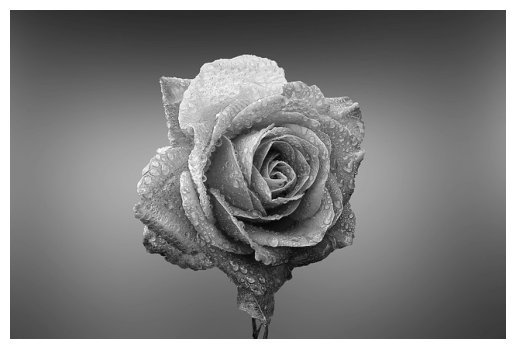

In [4]:
# Extract RGB values from the original image
rgb_array = np.array(image)
plt.imshow(image)
# Convert the RGB image to grayscale image
gray_image = image.convert('L')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()

In [5]:
# Convert to numpy array and then to 8-bit binary
gray_array = np.array(gray_image)

print(gray_array)

[[64 63 63 ... 68 68 68]
 [63 63 63 ... 68 69 69]
 [63 63 63 ... 69 69 69]
 ...
 [74 74 74 ... 57 57 57]
 [76 75 75 ... 57 57 57]
 [75 75 75 ... 57 57 56]]


In [6]:
# Create bit planes
bit_planes = np.unpackbits(np.expand_dims(gray_array, axis=-1), axis=-1)
# Reshape the bit planes to form a 3D array
bit_planes_3d = bit_planes.reshape(gray_array.shape + (8,))

# Print the shape of the 3D array and a small part of the array
print("Shape of the 3D array:", bit_planes_3d.shape)
print("Small section of the array:")
print(bit_planes_3d)  # Print the first 5x5 section of the bit planes

Shape of the 3D array: (425, 640, 8)
Small section of the array:
[[[0 1 0 ... 0 0 0]
  [0 0 1 ... 1 1 1]
  [0 0 1 ... 1 1 1]
  ...
  [0 1 0 ... 1 0 0]
  [0 1 0 ... 1 0 0]
  [0 1 0 ... 1 0 0]]

 [[0 0 1 ... 1 1 1]
  [0 0 1 ... 1 1 1]
  [0 0 1 ... 1 1 1]
  ...
  [0 1 0 ... 1 0 0]
  [0 1 0 ... 1 0 1]
  [0 1 0 ... 1 0 1]]

 [[0 0 1 ... 1 1 1]
  [0 0 1 ... 1 1 1]
  [0 0 1 ... 1 1 1]
  ...
  [0 1 0 ... 1 0 1]
  [0 1 0 ... 1 0 1]
  [0 1 0 ... 1 0 1]]

 ...

 [[0 1 0 ... 0 1 0]
  [0 1 0 ... 0 1 0]
  [0 1 0 ... 0 1 0]
  ...
  [0 0 1 ... 0 0 1]
  [0 0 1 ... 0 0 1]
  [0 0 1 ... 0 0 1]]

 [[0 1 0 ... 1 0 0]
  [0 1 0 ... 0 1 1]
  [0 1 0 ... 0 1 1]
  ...
  [0 0 1 ... 0 0 1]
  [0 0 1 ... 0 0 1]
  [0 0 1 ... 0 0 1]]

 [[0 1 0 ... 0 1 1]
  [0 1 0 ... 0 1 1]
  [0 1 0 ... 0 1 1]
  ...
  [0 0 1 ... 0 0 1]
  [0 0 1 ... 0 0 1]
  [0 0 1 ... 0 0 0]]]


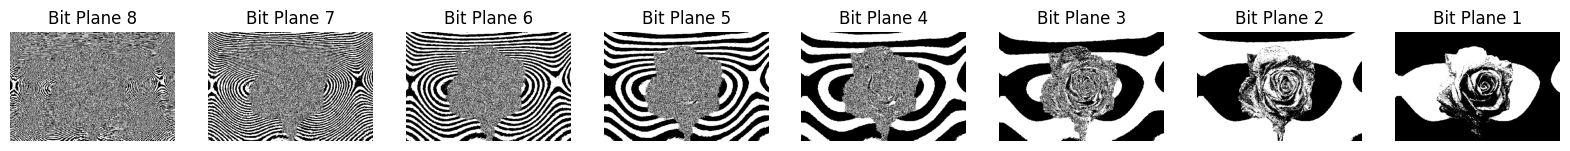

In [7]:
# Stack all bit planes horizontally to form a 3D cube
bit_cube = np.concatenate([bit_planes_3d[:, :, 7 - bit][:, :, np.newaxis] for bit in range(8)], axis=-1)

# Display each bit plane as a subplot
fig, axes = plt.subplots(1, 8, figsize=(20, 3))

for i, ax in enumerate(axes):
    ax.imshow(bit_cube[:, :, i], cmap='gray')
    ax.set_title(f"Bit Plane {8 - i}")
    ax.axis('off')

plt.show()

In [8]:
# Shuffle the binary values in the 3D matrix
shuffled_bit_planes_3d = 1 - bit_planes_3d

# Print the shape of the shuffled 3D array and a small part of the array
print("Shape of the shuffled 3D array:", shuffled_bit_planes_3d.shape)
print("Small section of the shuffled array:")
print(shuffled_bit_planes_3d)  # Print the first 5x5 section of the shuffled bit planes

Shape of the shuffled 3D array: (425, 640, 8)
Small section of the shuffled array:
[[[1 0 1 ... 1 1 1]
  [1 1 0 ... 0 0 0]
  [1 1 0 ... 0 0 0]
  ...
  [1 0 1 ... 0 1 1]
  [1 0 1 ... 0 1 1]
  [1 0 1 ... 0 1 1]]

 [[1 1 0 ... 0 0 0]
  [1 1 0 ... 0 0 0]
  [1 1 0 ... 0 0 0]
  ...
  [1 0 1 ... 0 1 1]
  [1 0 1 ... 0 1 0]
  [1 0 1 ... 0 1 0]]

 [[1 1 0 ... 0 0 0]
  [1 1 0 ... 0 0 0]
  [1 1 0 ... 0 0 0]
  ...
  [1 0 1 ... 0 1 0]
  [1 0 1 ... 0 1 0]
  [1 0 1 ... 0 1 0]]

 ...

 [[1 0 1 ... 1 0 1]
  [1 0 1 ... 1 0 1]
  [1 0 1 ... 1 0 1]
  ...
  [1 1 0 ... 1 1 0]
  [1 1 0 ... 1 1 0]
  [1 1 0 ... 1 1 0]]

 [[1 0 1 ... 0 1 1]
  [1 0 1 ... 1 0 0]
  [1 0 1 ... 1 0 0]
  ...
  [1 1 0 ... 1 1 0]
  [1 1 0 ... 1 1 0]
  [1 1 0 ... 1 1 0]]

 [[1 0 1 ... 1 0 0]
  [1 0 1 ... 1 0 0]
  [1 0 1 ... 1 0 0]
  ...
  [1 1 0 ... 1 1 0]
  [1 1 0 ... 1 1 0]
  [1 1 0 ... 1 1 1]]]


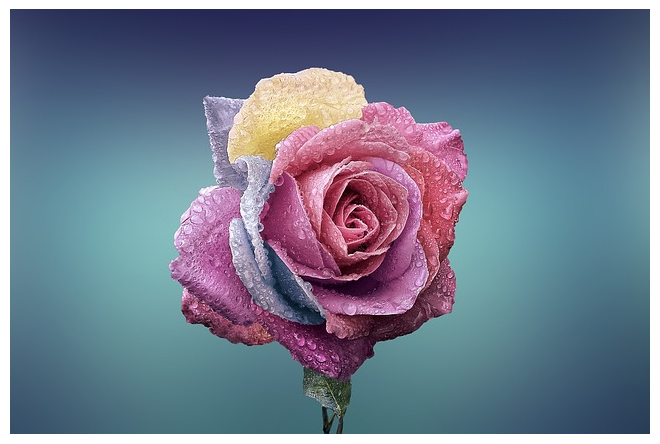

In [9]:
#Display the RGB img // remove this comment if needed to show the rgb image.

plt.imshow(rgb_array)
plt.axis('off')
plt.gca().set_axis_off()
plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.margins(0, 0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.gca().set_facecolor("None")

plt.show()

In [10]:
# Define the encoding rule
encoding_rule = {
    '00': 'A',
    '11': 'T',
    '01': 'C',
    '10': 'G'
}

# Apply the encoding rule to the entire 3D array
def map_to_dna(bit_planes_3d):
    # Convert 3D array to 2D array for easy processing
    flattened_array = bit_planes_3d.reshape(-1, 8)

    # Convert each 8-bit binary value to DNA sequence
    dna_sequences = []
    for binary_value in flattened_array:
        binary_string = ''.join(map(str, binary_value))
        binary_pairs = [binary_string[i:i+2] for i in range(0, len(binary_string), 2)]
        dna_sequence = ''.join(encoding_rule[pair] for pair in binary_pairs)
        dna_sequences.append(dna_sequence)

    # Reshape the result back to the original 3D shape
    mapped_dna_array = np.array(dna_sequences).reshape(bit_planes_3d.shape[:-1])

    return mapped_dna_array

# Apply DNA mapping to the shuffled bit planes
mapped_dna_array = map_to_dna(shuffled_bit_planes_3d)

# Print the shape of the mapped DNA array and a small part of the array
print("Shape of the mapped DNA array:", mapped_dna_array.shape)
print("Small section of the mapped DNA array:")
print(mapped_dna_array)  # Print the first 5x5 section of the mapped DNA array



Shape of the mapped DNA array: (425, 640)
Small section of the mapped DNA array:
[['GTTT' 'TAAA' 'TAAA' ... 'GTGT' 'GTGT' 'GTGT']
 ['TAAA' 'TAAA' 'TAAA' ... 'GTGT' 'GTGG' 'GTGG']
 ['TAAA' 'TAAA' 'TAAA' ... 'GTGG' 'GTGG' 'GTGG']
 ...
 ['GTCC' 'GTCC' 'GTCC' ... 'TACG' 'TACG' 'TACG']
 ['GTAT' 'GTCA' 'GTCA' ... 'TACG' 'TACG' 'TACG']
 ['GTCA' 'GTCA' 'GTCA' ... 'TACG' 'TACG' 'TACT']]


In [11]:
# Function to convert DNA to RNA
def convert_to_rna(dna_seq):
  rna_seq = ""
  for base in dna_seq:
    if base == 'T':
      base = 'U'
    rna_seq += base
  return rna_seq

# Apply DNA to RNA conversion
mapped_rna_array = np.empty_like(mapped_dna_array)
for i in range(mapped_dna_array.shape[0]):
  for j in range(mapped_dna_array.shape[1]):
    mapped_rna_array[i,j] = convert_to_rna(mapped_dna_array[i,j])

print(mapped_rna_array)

[['GUUU' 'UAAA' 'UAAA' ... 'GUGU' 'GUGU' 'GUGU']
 ['UAAA' 'UAAA' 'UAAA' ... 'GUGU' 'GUGG' 'GUGG']
 ['UAAA' 'UAAA' 'UAAA' ... 'GUGG' 'GUGG' 'GUGG']
 ...
 ['GUCC' 'GUCC' 'GUCC' ... 'UACG' 'UACG' 'UACG']
 ['GUAU' 'GUCA' 'GUCA' ... 'UACG' 'UACG' 'UACG']
 ['GUCA' 'GUCA' 'GUCA' ... 'UACG' 'UACG' 'UACU']]


In [12]:
# RNA Translation rules
rna_mutation_rules = {
    'A':'U',
    'U':'G',
    'G':'C',
    'C':'A'
}

# Function to translate RNA
def mutate_rna(rna_seq):
  translated_seq = ""
  for base in rna_seq:
    translated_seq += rna_mutation_rules[base]
  return translated_seq

# RNA mutation
mutated_rna_array = np.empty_like(mapped_rna_array)
for i in range(mapped_rna_array.shape[0]):
  for j in range(mapped_rna_array.shape[1]):
    mutated_rna_array[i,j] = mutate_rna(mapped_rna_array[i,j])

print(mutated_rna_array)

[['CGGG' 'GUUU' 'GUUU' ... 'CGCG' 'CGCG' 'CGCG']
 ['GUUU' 'GUUU' 'GUUU' ... 'CGCG' 'CGCC' 'CGCC']
 ['GUUU' 'GUUU' 'GUUU' ... 'CGCC' 'CGCC' 'CGCC']
 ...
 ['CGAA' 'CGAA' 'CGAA' ... 'GUAC' 'GUAC' 'GUAC']
 ['CGUG' 'CGAU' 'CGAU' ... 'GUAC' 'GUAC' 'GUAC']
 ['CGAU' 'CGAU' 'CGAU' ... 'GUAC' 'GUAC' 'GUAG']]


In [13]:
# New RNA translation rules
rna_translate_rules = {
    'A': 'U',
    'U': 'A',
    'G': 'C',
    'C': 'G'
}

# Function to translate RNA using the new rules
def translate_rna(rna_seq):
    translated_seq = ""
    for base in rna_seq:
        translated_seq += rna_translate_rules[base]
    return translated_seq

# Apply the updated RNA translation to the mutated RNA array
translated_rna_array = np.empty_like(mutated_rna_array)
for i in range(mutated_rna_array.shape[0]):
    for j in range(mutated_rna_array.shape[1]):
        translated_rna_array[i, j] = translate_rna(mutated_rna_array[i, j])

# Print the translated RNA array
print(translated_rna_array)


[['GCCC' 'CAAA' 'CAAA' ... 'GCGC' 'GCGC' 'GCGC']
 ['CAAA' 'CAAA' 'CAAA' ... 'GCGC' 'GCGG' 'GCGG']
 ['CAAA' 'CAAA' 'CAAA' ... 'GCGG' 'GCGG' 'GCGG']
 ...
 ['GCUU' 'GCUU' 'GCUU' ... 'CAUG' 'CAUG' 'CAUG']
 ['GCAC' 'GCUA' 'GCUA' ... 'CAUG' 'CAUG' 'CAUG']
 ['GCUA' 'GCUA' 'GCUA' ... 'CAUG' 'CAUG' 'CAUC']]


In [14]:
rna_rules = {
  'A':'00',
  'U':'11',
  'G':'01',
  'C':'10'
}
# Initialize output 3D array
binary_array = np.zeros((len(translated_rna_array), len(translated_rna_array[0]), len(translated_rna_array[0][0])*2), dtype=int)

# Map each base to binary
for i in range(len(translated_rna_array)):
  for j in range(len(translated_rna_array[i])):
    for k, base in enumerate(translated_rna_array[i][j]):
      binary_array[i,j,k*2:k*2+2] = [int(x) for x in rna_rules[base]]
print("Shape of the 3D array:", binary_array.shape)
print(binary_array)

Shape of the 3D array: (425, 640, 8)
[[[0 1 1 ... 0 1 0]
  [1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  ...
  [0 1 1 ... 1 1 0]
  [0 1 1 ... 1 1 0]
  [0 1 1 ... 1 1 0]]

 [[1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  ...
  [0 1 1 ... 1 1 0]
  [0 1 1 ... 1 0 1]
  [0 1 1 ... 1 0 1]]

 [[1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  ...
  [0 1 1 ... 1 0 1]
  [0 1 1 ... 1 0 1]
  [0 1 1 ... 1 0 1]]

 ...

 [[0 1 1 ... 1 1 1]
  [0 1 1 ... 1 1 1]
  [0 1 1 ... 1 1 1]
  ...
  [1 0 0 ... 1 0 1]
  [1 0 0 ... 1 0 1]
  [1 0 0 ... 1 0 1]]

 [[0 1 1 ... 0 1 0]
  [0 1 1 ... 1 0 0]
  [0 1 1 ... 1 0 0]
  ...
  [1 0 0 ... 1 0 1]
  [1 0 0 ... 1 0 1]
  [1 0 0 ... 1 0 1]]

 [[0 1 1 ... 1 0 0]
  [0 1 1 ... 1 0 0]
  [0 1 1 ... 1 0 0]
  ...
  [1 0 0 ... 1 0 1]
  [1 0 0 ... 1 0 1]
  [1 0 0 ... 1 1 0]]]


In [15]:
# Number of rows and columns in the binary_array
num_rows, num_cols, num_channels = binary_array.shape

# Print the obtained dimensions
print("Number of Rows:", num_rows)
print("Number of Columns:", num_cols)
print("Number of Channels:", num_channels)

Number of Rows: 425
Number of Columns: 640
Number of Channels: 8


(425, 640, 8)


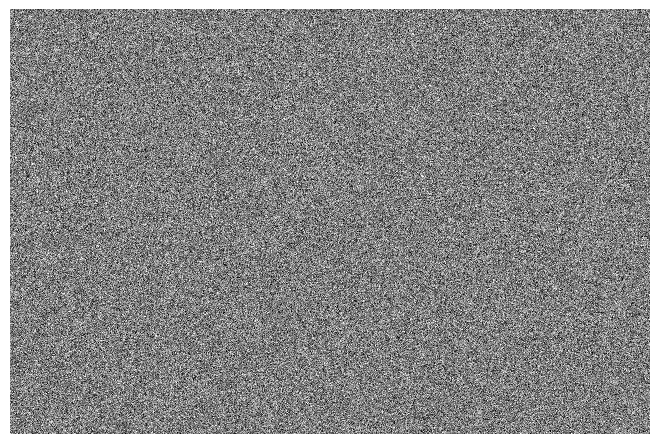

In [16]:
# Initialize random 3D binary array
binary_array = np.random.randint(0, 2, size=(num_rows, num_cols, num_channels))

# Print shape to validate 3D
print(binary_array.shape)

# Get dimensions
rows, cols, channels = binary_array.shape

# Create empty image array
image1 = np.zeros((rows, cols))

# Populate image by summing values across channels
for i in range(rows):
  for j in range(cols):
    image1[i,j] = np.sum(binary_array[i,j,:])

# Normalize to 0-255 range
image1 = image1 - np.min(image1)
image1 = (255*image1/np.max(image1)).astype(np.uint8)

# Display encrypted image
plt.imshow(image1, cmap='gray')
plt.axis('off')
plt.gca().set_axis_off()
plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.margins(0, 0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.gca().set_facecolor("None")

plt.show()


In [17]:
def reverse_binary_to_rna(binary_array):
    # Inverse of the RNA rules
    inverse_rna_rules = {
        '00': 'A',
        '11': 'U',
        '01': 'G',
        '10': 'C'
    }

    # Initialize an array to hold the reversed RNA data
    reversed_rna_array = np.empty_like(binary_array, dtype='object')

    for i in range(binary_array.shape[0]):
        for j in range(binary_array.shape[1]):
            binary_seq = binary_array[i, j]
            rna_seq = ''
            for k in range(0, binary_seq.shape[0], 2):
                binary_pair = ''.join(map(str, binary_seq[k:k+2]))
                if binary_pair in inverse_rna_rules:
                    rna_seq += inverse_rna_rules[binary_pair]
                else:
                    print(f"Unexpected binary pair: {binary_pair} at position [{i}, {j}, {k//2}]")
            reversed_rna_array[i, j] = rna_seq

    return reversed_rna_array

# Call the function to reverse the binary to RNA mapping
reversed_rna_array = reverse_binary_to_rna(binary_array)

# Print a small section of the array for verification
print("Reversed RNA Array (Section):")
print(reversed_rna_array[:5, :5])  # Adjust indices as needed


Reversed RNA Array (Section):
[[['UCCC' 'UCCC' 'UCCC' 'UCCC' 'UCCC' 'UCCC' 'UCCC' 'UCCC']
  ['AAUG' 'AAUG' 'AAUG' 'AAUG' 'AAUG' 'AAUG' 'AAUG' 'AAUG']
  ['GAAG' 'GAAG' 'GAAG' 'GAAG' 'GAAG' 'GAAG' 'GAAG' 'GAAG']
  ['GAUU' 'GAUU' 'GAUU' 'GAUU' 'GAUU' 'GAUU' 'GAUU' 'GAUU']
  ['GGAA' 'GGAA' 'GGAA' 'GGAA' 'GGAA' 'GGAA' 'GGAA' 'GGAA']]

 [['UAGA' 'UAGA' 'UAGA' 'UAGA' 'UAGA' 'UAGA' 'UAGA' 'UAGA']
  ['CGUA' 'CGUA' 'CGUA' 'CGUA' 'CGUA' 'CGUA' 'CGUA' 'CGUA']
  ['GAUU' 'GAUU' 'GAUU' 'GAUU' 'GAUU' 'GAUU' 'GAUU' 'GAUU']
  ['UCCU' 'UCCU' 'UCCU' 'UCCU' 'UCCU' 'UCCU' 'UCCU' 'UCCU']
  ['ACCA' 'ACCA' 'ACCA' 'ACCA' 'ACCA' 'ACCA' 'ACCA' 'ACCA']]

 [['GCGC' 'GCGC' 'GCGC' 'GCGC' 'GCGC' 'GCGC' 'GCGC' 'GCGC']
  ['UCUU' 'UCUU' 'UCUU' 'UCUU' 'UCUU' 'UCUU' 'UCUU' 'UCUU']
  ['UCGG' 'UCGG' 'UCGG' 'UCGG' 'UCGG' 'UCGG' 'UCGG' 'UCGG']
  ['CGCA' 'CGCA' 'CGCA' 'CGCA' 'CGCA' 'CGCA' 'CGCA' 'CGCA']
  ['GAAC' 'GAAC' 'GAAC' 'GAAC' 'GAAC' 'GAAC' 'GAAC' 'GAAC']]

 [['GGAC' 'GGAC' 'GGAC' 'GGAC' 'GGAC' 'GGAC' 'GGAC' 'GGAC']
  ['

In [18]:
# Reverse RNA Translation Function
def reverse_translate_rna(seq):
    reverse_rna_translate_rules = {
        'U': 'A',
        'A': 'U',
        'C': 'G',
        'G': 'C'
    }

    reversed_seq = ""
    for base in seq:
        reversed_seq += reverse_rna_translate_rules[base]
    return reversed_seq

# Initialize an array to hold the reversed RNA data
reversed_2d_rna_array = np.empty_like(translated_rna_array, dtype='object')

for i in range(translated_rna_array.shape[0]):
    for j in range(translated_rna_array.shape[1]):
        rna_seq = translated_rna_array[i, j]
        reversed_seq = reverse_translate_rna(rna_seq)
        reversed_2d_rna_array[i, j] = reversed_seq

# Print a small section of the array for verification
print("Reversed 2D RNA Array (Section):")
print(reversed_2d_rna_array[:5, :5])  # Adjust indices as needed


Reversed 2D RNA Array (Section):
[['CGGG' 'GUUU' 'GUUU' 'GUUA' 'GUUA']
 ['GUUU' 'GUUU' 'GUUU' 'GUUA' 'GUUA']
 ['GUUU' 'GUUU' 'GUUU' 'GUUU' 'GUUA']
 ['CGGG' 'GUUU' 'GUUU' 'GUUU' 'GUUU']
 ['CGGG' 'CGGG' 'CGGG' 'GUUU' 'GUUU']]


In [19]:
# Reverse DNA to RNA Conversion Function
def reverse_convert_to_dna(rna_seq):
    dna_seq = ""
    for base in rna_seq:
        if base == 'U':
            base = 'T'
        dna_seq += base
    return dna_seq

# Initialize an array to hold the reversed RNA data
reversed_dna_to_rna_array = np.empty_like(mapped_rna_array, dtype='object')

for i in range(mapped_rna_array.shape[0]):
    for j in range(mapped_rna_array.shape[1]):
        rna_seq = mapped_rna_array[i, j]
        reversed_seq = reverse_convert_to_dna(rna_seq)
        reversed_dna_to_rna_array[i, j] = reversed_seq

# Print a small section of the array for verification
print("Reversed DNA to RNA Array (Section):")
print(reversed_dna_to_rna_array[:5, :5])  # Adjust indices as needed



Reversed DNA to RNA Array (Section):
[['GTTT' 'TAAA' 'TAAA' 'TAAC' 'TAAC']
 ['TAAA' 'TAAA' 'TAAA' 'TAAC' 'TAAC']
 ['TAAA' 'TAAA' 'TAAA' 'TAAA' 'TAAC']
 ['GTTT' 'TAAA' 'TAAA' 'TAAA' 'TAAA']
 ['GTTT' 'GTTT' 'GTTT' 'TAAA' 'TAAA']]


In [20]:
# Reverse Encoding Rule
reverse_encoding_rule = {
    'A': '00',
    'T': '11',
    'C': '01',
    'G': '10'
}

# Apply the reverse encoding rule to the entire 3D array
def reverse_map_to_dna(mapped_dna_array):
    # Convert 3D array to 2D array for easy processing
    flattened_array = mapped_dna_array.reshape(-1)

    # Convert each DNA sequence to 8-bit binary values
    binary_sequences = []
    for dna_sequence in flattened_array:
        binary_pairs = [reverse_encoding_rule[base] for base in dna_sequence]
        binary_string = ''.join(binary_pairs)
        binary_values = [int(bit) for bit in binary_string]
        binary_sequences.append(binary_values)

    # Reshape the result back to the original 3D shape
    reversed_bit_planes_3d = np.array(binary_sequences).reshape(mapped_dna_array.shape + (8,))

    return reversed_bit_planes_3d

# Apply the reverse DNA mapping to obtain the shuffled bit planes
reversed_bit_planes_3d = reverse_map_to_dna(mapped_dna_array)

# Print the shape of the reversed bit planes 3D array and a small part of the array
print("Shape of the reversed bit planes 3D array:", reversed_bit_planes_3d.shape)
print("Small section of the reversed bit planes 3D array:")
print(reversed_bit_planes_3d[:5, :5, :])  # Adjust indices as needed


Shape of the reversed bit planes 3D array: (425, 640, 8)
Small section of the reversed bit planes 3D array:
[[[1 0 1 1 1 1 1 1]
  [1 1 0 0 0 0 0 0]
  [1 1 0 0 0 0 0 0]
  [1 1 0 0 0 0 0 1]
  [1 1 0 0 0 0 0 1]]

 [[1 1 0 0 0 0 0 0]
  [1 1 0 0 0 0 0 0]
  [1 1 0 0 0 0 0 0]
  [1 1 0 0 0 0 0 1]
  [1 1 0 0 0 0 0 1]]

 [[1 1 0 0 0 0 0 0]
  [1 1 0 0 0 0 0 0]
  [1 1 0 0 0 0 0 0]
  [1 1 0 0 0 0 0 0]
  [1 1 0 0 0 0 0 1]]

 [[1 0 1 1 1 1 1 1]
  [1 1 0 0 0 0 0 0]
  [1 1 0 0 0 0 0 0]
  [1 1 0 0 0 0 0 0]
  [1 1 0 0 0 0 0 0]]

 [[1 0 1 1 1 1 1 1]
  [1 0 1 1 1 1 1 1]
  [1 0 1 1 1 1 1 1]
  [1 1 0 0 0 0 0 0]
  [1 1 0 0 0 0 0 0]]]


In [21]:
# Function to unscramble the matrix by flipping 1s to 0s and vice versa
def unscramble_matrix(reversed_bit_planes_3d):
    unscrambled_bit_planes_3d = 1 - reversed_bit_planes_3d  # Flip 1s to 0s and vice versa
    return unscrambled_bit_planes_3d

# Apply the unscrambling operation to the reversed bit planes 3D array
unscrambled_bit_planes_3d = unscramble_matrix(reversed_bit_planes_3d)

# Print the shape of the unscrambled bit planes 3D array and a small part of the array
print("Shape of the unscrambled bit planes 3D array:", unscrambled_bit_planes_3d.shape)
print("Small section of the unscrambled bit planes 3D array:")
print(unscrambled_bit_planes_3d[:5, :5, :])  # Adjust indices as needed


Shape of the unscrambled bit planes 3D array: (425, 640, 8)
Small section of the unscrambled bit planes 3D array:
[[[0 1 0 0 0 0 0 0]
  [0 0 1 1 1 1 1 1]
  [0 0 1 1 1 1 1 1]
  [0 0 1 1 1 1 1 0]
  [0 0 1 1 1 1 1 0]]

 [[0 0 1 1 1 1 1 1]
  [0 0 1 1 1 1 1 1]
  [0 0 1 1 1 1 1 1]
  [0 0 1 1 1 1 1 0]
  [0 0 1 1 1 1 1 0]]

 [[0 0 1 1 1 1 1 1]
  [0 0 1 1 1 1 1 1]
  [0 0 1 1 1 1 1 1]
  [0 0 1 1 1 1 1 1]
  [0 0 1 1 1 1 1 0]]

 [[0 1 0 0 0 0 0 0]
  [0 0 1 1 1 1 1 1]
  [0 0 1 1 1 1 1 1]
  [0 0 1 1 1 1 1 1]
  [0 0 1 1 1 1 1 1]]

 [[0 1 0 0 0 0 0 0]
  [0 1 0 0 0 0 0 0]
  [0 1 0 0 0 0 0 0]
  [0 0 1 1 1 1 1 1]
  [0 0 1 1 1 1 1 1]]]


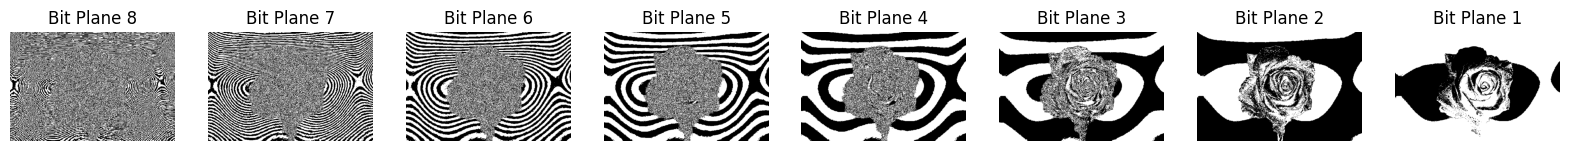

In [22]:
# Stack all bit planes horizontally to form a 3D cube
unscrambled_bit_cube = np.concatenate([reversed_bit_planes_3d[:, :, 7 - bit][:, :, np.newaxis] for bit in range(8)], axis=-1)

# Display each bit plane as a subplot
fig, axes = plt.subplots(1, 8, figsize=(20, 3))

for i, ax in enumerate(axes):
    ax.imshow(unscrambled_bit_cube[:, :, i], cmap='gray')
    ax.set_title(f"Bit Plane {8 - i}")
    ax.axis('off')

plt.show()

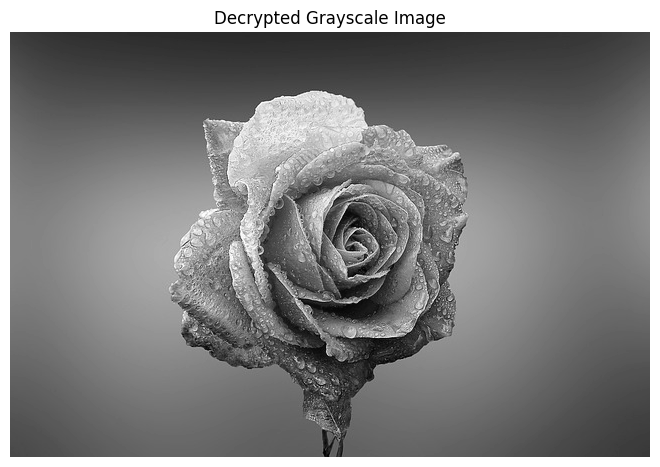

In [23]:
# Function to convert a binary matrix to pixel values
def binary_to_pixels(binary_matrix):
    # Reshape the binary matrix to a flat 1D array
    flat_binary = binary_matrix.reshape(-1, 8)

    # Convert each 8-bit binary value to an integer
    pixel_values = []
    for binary_value in flat_binary:
        binary_string = ''.join(map(str, binary_value))
        decimal_value = int(binary_string, 2)
        pixel_values.append(decimal_value)

    # Reshape the result back to the original 2D shape (image dimensions)
    pixel_array = np.array(pixel_values, dtype=np.uint8).reshape(binary_matrix.shape[:-1])

    return pixel_array

# Apply the conversion to pixel values
pixel_image = binary_to_pixels(unscrambled_bit_planes_3d)

# Display the pixel image
plt.imshow(pixel_image, cmap='gray')
plt.title('Decrypted Grayscale Image')
plt.axis('off')
plt.gca().set_axis_off()
plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.margins(0, 0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.gca().set_facecolor("None")

plt.show()


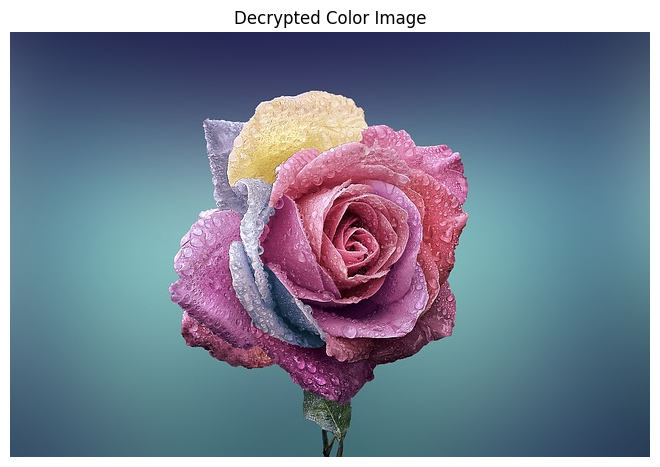

In [24]:
# Assuming you have the unscrambled grayscale image in 'pixel_image'
# Convert the grayscale image to a color image using the stored RGB values
color_image = np.stack((pixel_image,) * 3, axis=-1)

# Display the color image
plt.imshow(rgb_array)
plt.title('Decrypted Color Image')
plt.axis('off')
plt.gca().set_axis_off()
plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.margins(0, 0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.gca().set_facecolor("None")

plt.show()

